# 对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

In [191]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [192]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [193]:
print("Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teacher ratio by town\n        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n        - LSTAT    % lower status of the population\n        - MEDV     Median value of owner-occupied homes in $1000's\n\n    :Missing Attribute Values: None\n\n    :Creator: Harrison, D. and Rubinfeld, D.L.\n\nThis is a copy of UCI ML housing dataset.\nhttp://archive.ics.uci.edu/ml/datasets/Housing\n\n\nThis dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.\n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\nprices and the demand for clean air', J. Environ. Economics & Management,\nvol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.\n\nThe Boston house-price data has been used in many machine learning papers that address regression\nproblems.   \n     \n**References**\n\n   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.\n   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.\n   - many more! (")

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [194]:
# 将 完整的数据集 分成 训练集和测试集
# 使用所有特征 对 模型进行训练

In [195]:
data = boston.data  # 特征值
feature_names = boston.feature_names  # 特征名
target = boston.target # 目标值

In [196]:
df =  DataFrame(data,columns=feature_names)

## 查看数据容量

In [197]:
data.shape

(506, 13)

## 拆分样本为训练集和测试集

In [198]:
# 训练集
X_train = data[:450]
y_train = target[:450]

# 测试集
X_test = data[450:]
y_test = target[450:]

In [199]:
lr = LinearRegression()
rr = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)

In [200]:
lr.fit(X_train,y_train)
rr.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [201]:
y1_ = lr.predict(X_test)
y2_ = rr.predict(X_test)
y3_ = lasso.predict(X_test)

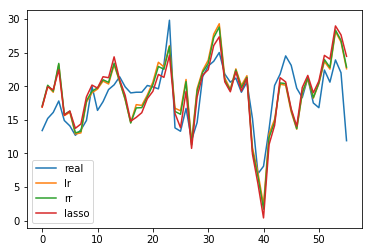

In [202]:
plt.plot(y_test,label='real')
plt.plot(y1_,label='lr')
plt.plot(y2_,label='rr')
plt.plot(y3_,label='lasso')
plt.legend()

## 回归模型打分

In [204]:
from sklearn.metrics import r2_score

In [205]:
# 传入 测试集的 真实的目标值 和 预测出来的目标值
r2_score(y_test,y1_)  # 

0.376697688107445

In [206]:
r2_score(y_test,y2_)

0.36142967806651205

In [207]:
r2_score(y_test,y3_)

0.28850786167590825

## 普通问题 使用普通线性回归

In [210]:
# 获取训练集特征值（所有样本的距离就业中心的距离这一列）
X_train = df['DIS'].values.reshape(-1,1)
# 训练集 目标值
y_train = target

In [211]:
lr = LinearRegression()

In [212]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

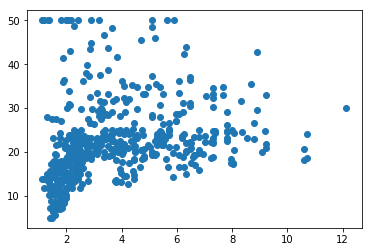

In [213]:
plt.scatter(X_train,y_train)

In [214]:
X_test = np.linspace(0,12,10).reshape(-1,1)
X_test

array([[ 0.        ],
       [ 1.33333333],
       [ 2.66666667],
       [ 4.        ],
       [ 5.33333333],
       [ 6.66666667],
       [ 8.        ],
       [ 9.33333333],
       [10.66666667],
       [12.        ]])

In [215]:
y_ = lr.predict(X_test)

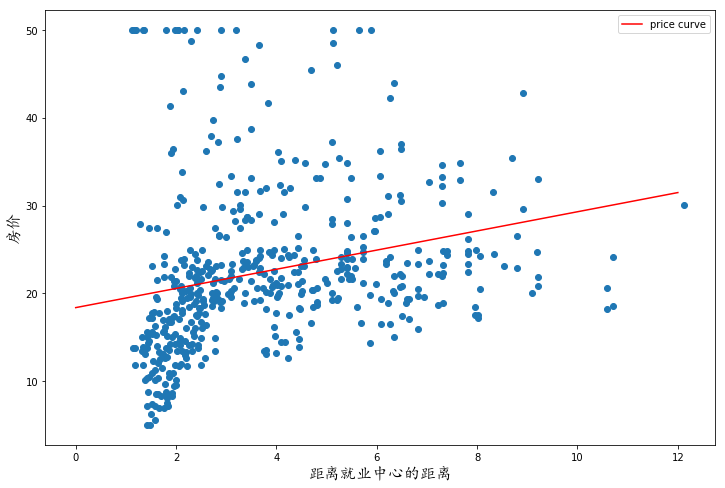

In [216]:
plt.figure(figsize=(12,8))
plt.scatter(X_train,y_train)
plt.plot(X_test,y_,color='r',label='price curve')
plt.xlabel('距离就业中心的距离',fontproperties='KaiTi',size=16)
plt.ylabel('房价',fontproperties='KaiTi',size=16)
plt.legend()